<a href="https://colab.research.google.com/github/hseongeun/projectmanager/blob/main/ai_pm_4%EC%9D%BC%EC%B0%A8_9_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 복습
회귀분석
오늘 해 볼 것 : price와 year의 관계 분석해보고 결과를 해석

In [ ]:
import pandas as pd
df = pd.read_excel('car.xlsx')

In [ ]:
from statsmodels.formula.api import ols
m = ols('price~year', data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     597.3
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           1.39e-70
Time:                        00:36:55   Log-Likelihood:                -1820.2
No. Observations:                 274   AIC:                             3644.
Df Residuals:                     272   BIC:                             3652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.135e+05   8771.400    -24.341      0.000   -2.31e+05   -1.96e+05
year         106.4745      4.357     24.439      0.000      97.897     115.052
==============================================================================
Omnibus:                        9.748   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.774
Skew:                           0.447   Prob(JB):                      0.00754
Kurtosis:                       3.236   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

price = 106.4745 x year + -2.135e+05

= 106.4745 x year + -2.135 x 100000

귀무가설 : 모집단에서 회귀계수 = 0

p(=0) < 0.05 : 귀무가설 기각


# 수업 시작

In [ ]:
new_df = pd.DataFrame({'year': [2014,2015,2016,2017]})
new_df

,year
0,2014
1,2015
2,2016
3,2017


In [ ]:
m.predict(new_df)

0     930.990601
1    1037.465097
2    1143.939593
3    1250.414089
dtype: float64


### R-squared
1에 가까울수록 좋음. 0.687-> 68%정도의 정확도

In [ ]:
!pip install pingouin

In [ ]:
import pingouin as pg
pg.corr(df.price, df.year)

,n,r,CI95%,p-val,BF10,power
pearson,274,0.828908,"[0.79, 0.86]",1.388002e-70,1.004e+67,1.0


In [ ]:
0.828908 ** 2

0.687088472464

### 다중회귀분석
독립변수가 2개 이상인 회귀분석

관계식에서 +로 변수 구분(더하라는 뜻이 아님)

In [ ]:
m = ols('price ~ mileage + year', data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     403.5
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           5.62e-82
Time:                        01:12:00   Log-Likelihood:                -1790.2
No. Observations:                 274   AIC:                             3586.
Df Residuals:                     271   BIC:                             3597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.688e+05   9597.865    -17.592      0.000   -1.88e+05    -1.5e+05
mileage       -0.0023      0.000     -8.143      0.000      -0.003      -0.002
year          84.3822      4.761     17.724      0.000      75.009      93.755
==============================================================================
Omnibus:                       11.272   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.786
Skew:                           0.435   Prob(JB):                      0.00276
Kurtosis:                       3.523   Cond. No.                     8.41e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

해석

price = -168800 -0.0023 * mileage + 84.3822 * year

r-squared : 75%

In [ ]:
mileage = 50000
year = 2015
-168800 -0.0023 * mileage + 84.3822 * year

1115.1330000000016

### 통계적 통제
z를 모형의 독립변수로 함께 포함하여 x의 기울기에 z의 영향이 간접반영 되지 않도록 함

가격을 분석할 때, year에 mileage까지 추가해서 분석함

- mileage를 통계적으로 통제했을 때, year이 price에 미치는 영향은 1년에 84만원

- year을 통계적으로 통제했을 때, mileage가 price에 미치는 영향은 1km에 -0.0023만원 = -23원

### 표준화
독립변수가 단위가 다르면 비교가 불가능하기 때문에 표준화 이용

(X-평균)/표준편차

표준화를 하면 평균 = 0, 표준편차 = 1

변수의 단위를 제거해 상대적인 영향력 비교 가능

In [ ]:
m = ols('price ~ scale(mileage) + scale(year)', data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     403.5
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           5.62e-82
Time:                        01:58:51   Log-Likelihood:                -1790.2
No. Observations:                 274   AIC:                             3586.
Df Residuals:                     271   BIC:                             3597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        853.6606     10.112     84.419      0.000     833.752     873.569
scale(mileage)  -100.2044     12.306     -8.143      0.000    -124.431     -75.978
scale(year)      218.1006     12.306     17.724      0.000     193.874     242.327
==============================================================================
Omnibus:                       11.272   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.786
Skew:                           0.435   Prob(JB):                      0.00276
Kurtosis:                       3.523   Cond. No.                         1.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

price = 853.6606 -100.2044 mileage + 218.1006 year

표준화했을 때 절편이 853 : 평균적인 mileage와 평균적인 year의 차가 853만원 정도

mileage가 1표준편차(43015km) 증가하면 가격은 100만원 떨어짐 (std 해보면 1표준편차 값 나옴)

year가 1표준편차(2.6년) 증가하면 가격은 218만원 상승

-> year가 mileage보다 영향이 큼

In [ ]:
df.mileage.std()

43015.79445317075

In [ ]:
df.year.std()

2.5894055796873823

- 통계적 통제는 다중회귀분석에서 기본적으로 반영이 됨

- 표준화는 변수간의 관계를 비교할 때에 사용

    - 표준화를 하든, 안하든 예측은 동일 / 해석이 달라짐

In [ ]:
m = ols('price ~ model', data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.039
Date:                Thu, 14 Sep 2023   Prob (F-statistic):             0.0824
Time:                        02:17:06   Log-Likelihood:                -1977.9
No. Observations:                 274   AIC:                             3960.
Df Residuals:                     272   BIC:                             3967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     833.4146     23.144     36.009      0.000     787.850     878.980
model[T.K3]    80.3970     46.121      1.743      0.082     -10.402     171.196
==============================================================================
Omnibus:                       13.893   Durbin-Watson:                   0.528
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.007
Skew:                           0.573   Prob(JB):                     0.000551
Kurtosis:                       3.002   Cond. No.                         2.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Intercept : 833.4146 (Avante의 예상가격)
- model[T.K3] : 80.3970 (Avante와 K3의 예상가격 차이)

'price = 833 + 80 * model[T.K3]'

- Avante : 'model[T.K3] = 0' 833만원으로 예상
- K3 : 'model[T.K3] = 1' 913만원으로 예상
---

- p-value > 0.05이므로 귀무가설(둘의 차이 = 0)을 기각할 수 없음
- 신뢰구간이 -10 ~ +171이므로(0도 포함됨)
--> 모집단에서도 K2가 Avante보다 비싸다고 하기에는 증거가 부족

In [ ]:
avante = df.price[df.model == 'Avante']
k3 = df.price[df.model == 'K3']
pg.ttest(k3, avante)
# pg.ttest(k3, avante, correction = False) # 독립표본 t 검정에서 보정을 안하면 회귀분석과 결과가 같음
# 무엇을 보정하나? 이분산성(heteroscedasticity) : 가격대가 퍼져있는 정도가 다르다

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.21101,196.691919,two-sided,0.028187,"[8.69, 152.11]",0.242614,1.482,0.4119


두 집단이 차이가 나는지 안 나는지는 t 검정이 더 정확

why? 보정을 하니까

then 회귀분석을 하는 이유? 예측을 하기 위해


In [ ]:
m = ols('price ~ year + mileage + model', data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     271.9
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           2.98e-81
Time:                        02:32:29   Log-Likelihood:                -1788.8
No. Observations:                 274   AIC:                             3586.
Df Residuals:                     270   BIC:                             3600.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.713e+05   9670.404    -17.714      0.000    -1.9e+05   -1.52e+05
model[T.K3]   -40.4089     23.626     -1.710      0.088     -86.925       6.107
year           85.6030      4.798     17.843      0.000      76.158      95.048
mileage        -0.0023      0.000     -8.186      0.000      -0.003      -0.002
==============================================================================
Omnibus:                        9.726   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.901
Skew:                           0.405   Prob(JB):                      0.00708
Kurtosis:                       3.458   Cond. No.                     8.50e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 판다스에서 날짜/시간 다루기

In [ ]:
pr = pd.read_excel('price.xlsx').sort_index(ascending = False)
pr

,Date,SPX,KOSPI200,GOLD
267,02/01/2001,1239.94,72.14,268.9
266,03/01/2001,1160.33,65.16,259.2
265,04/01/2001,1249.46,72.45,264.9
264,05/01/2001,1255.82,76.09,266.9
263,06/01/2001,1224.38,73.20,272.0
...,...,...,...,...
4,01/01/2023,4076.60,317.26,1962.2
3,02/01/2023,3970.15,314.80,1853.2
2,03/01/2023,4109.31,322.03,1969.0
1,04/01/2023,4169.48,326.46,1999.1


In [ ]:
pr.Date = pd.to_datetime(pr.Date)   # date를 날짜 형식으로 변환
pr

,Date,SPX,KOSPI200,GOLD
267,2001-02-01,1239.94,72.14,268.9
266,2001-03-01,1160.33,65.16,259.2
265,2001-04-01,1249.46,72.45,264.9
264,2001-05-01,1255.82,76.09,266.9
263,2001-06-01,1224.38,73.20,272.0
...,...,...,...,...
4,2023-01-01,4076.60,317.26,1962.2
3,2023-02-01,3970.15,314.80,1853.2
2,2023-03-01,4109.31,322.03,1969.0
1,2023-04-01,4169.48,326.46,1999.1


In [ ]:
pr.set_index('Date', inplace = True)   # index를 날짜로 해줌
pr

,SPX,KOSPI200,GOLD
Date,,,
2001-02-01,1239.94,72.14,268.9
2001-03-01,1160.33,65.16,259.2
2001-04-01,1249.46,72.45,264.9
2001-05-01,1255.82,76.09,266.9
2001-06-01,1224.38,73.20,272.0
...,...,...,...
2023-01-01,4076.60,317.26,1962.2
2023-02-01,3970.15,314.80,1853.2
2023-03-01,4109.31,322.03,1969.0


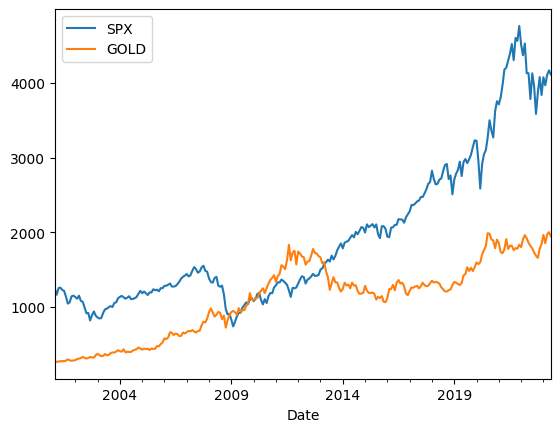

In [ ]:
import matplotlib.pyplot as plt
pr.SPX.plot()    # 미국 주가지수
pr.GOLD.plot()   # 금 지수
plt.legend()     # 범례

In [ ]:
pr.SPX

Date
2001-02-01    1239.94
2001-03-01    1160.33
2001-04-01    1249.46
2001-05-01    1255.82
2001-06-01    1224.38
               ...   
2023-01-01    4076.60
2023-02-01    3970.15
2023-03-01    4109.31
2023-04-01    4169.48
2023-05-01    4115.24
Name: SPX, Length: 268, dtype: float64

### 변화량 구하기

<Axes: xlabel='Date'>

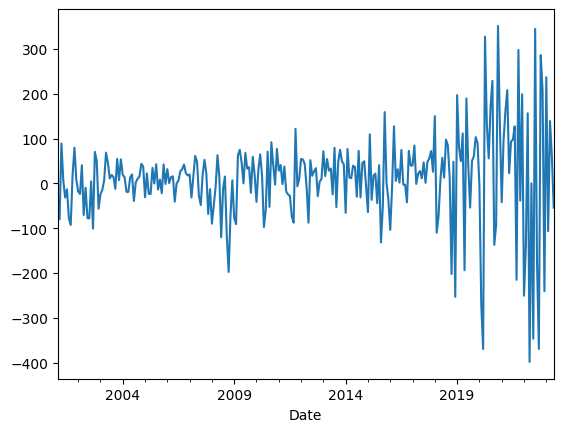

In [ ]:
pr.SPX.diff().plot()

<Axes: xlabel='Date'>

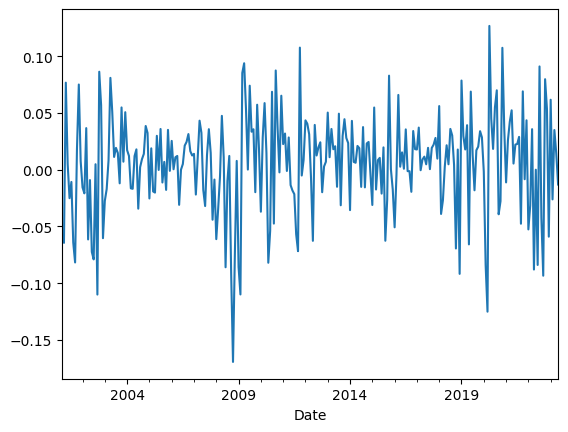

In [ ]:
pr.SPX.pct_change().plot()   # 변한 비율 알려줌

In [ ]:
# 미국 주식 변동과 금 가격 변동의 상관관계
pg.corr(pr.SPX.pct_change(), pr.GOLD.pct_change())

,n,r,CI95%,p-val,BF10,power
pearson,267,0.067286,"[-0.05, 0.19]",0.273275,0.139,0.195049


r이 -일 때 : 반대로 움직임

In [ ]:
# 미국 주식 변동과 한국 주식 변동의 상관관계
pg.corr(pr.SPX.pct_change(), pr.KOSPI200.pct_change())

,n,r,CI95%,p-val,BF10,power
pearson,267,0.684075,"[0.61, 0.74]",3.473300e-38,8.433e+34,1.0


### 일정 간격으로 데이터 뽑아내기
- A(연말), Q(분기말), M(월말), W(주말), D(일)
- B를 앞에 붙이면 주말 제외(영업일)
- S를 뒤에 붙이면 초를 뜻함 : AS(연초), QS(분기초) 등
- 분기에 기준월을 붙일 수 있음 : QS-FEB(2월 1일부터 3개월 간격)
- 주에 기준요일을 붙일 수 있음 : W-WED(매주 수요일)


<Axes: xlabel='Date'>

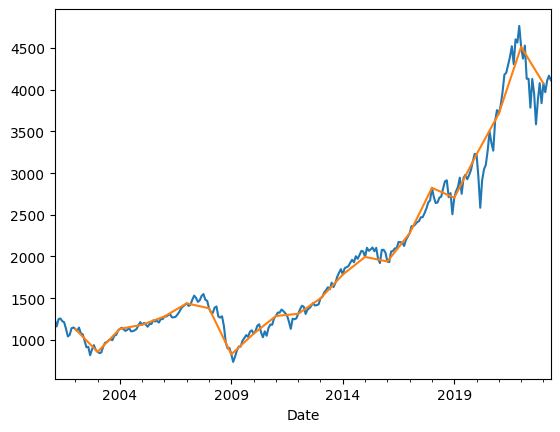

In [ ]:
pr.SPX.plot()
pr.SPX.asfreq('AS').plot()

In [ ]:
pr.SPX.asfreq('QS')

Date
2001-04-01    1249.46
2001-07-01    1211.23
2001-10-01    1059.78
2002-01-01    1130.20
2002-04-01    1076.92
               ...   
2022-04-01    4131.93
2022-07-01    4130.29
2022-10-01    3871.98
2023-01-01    4076.60
2023-04-01    4169.48
Freq: QS-JAN, Name: SPX, Length: 89, dtype: float64

### 빈 데이터 채우기

In [ ]:
df = pd.read_excel('GOOG.xlsx')
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)

In [ ]:
df.Price['2016-12-30']

771.82

In [ ]:
df.Price['2016-12-30':'2017-01-03']

Date
2016-12-30    771.82
2017-01-03    786.14
Name: Price, dtype: float64

In [ ]:
df.Price.asfreq('A', method='ffill')   # 빈 칸이면 이전 날짜의 데이터를 끌어옴
df.Price.asfreq('A', method='bfill')   # 빈 칸이면 다음 날짜의 데이터를 끌어옴

Date
2014-12-31     524.96
2015-12-31     758.88
2016-12-31     786.14
2017-12-31    1065.00
2018-12-31    1035.61
2019-12-31    1337.02
2020-12-31    1751.88
2021-12-31    2893.59
Freq: A-DEC, Name: Price, dtype: float64